In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import files

#** Task 1: Image Resizing and Blurring**

In [ ]:
print("Please upload an image:")
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

Please upload an image:


Saving Lab2Image.jpg to Lab2Image (1).jpg


In [ ]:
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

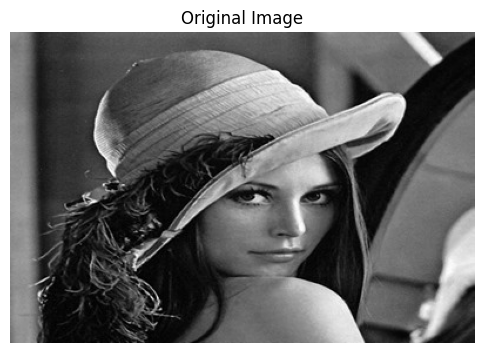

In [ ]:
plt.figure(figsize=(6, 6))
plt.title("Original Image")
plt.imshow(image)
plt.axis("off")
plt.show()

In [ ]:
print("\n1.1 Image Resizing:")

# Set scale percentage for resizing
scale_percent = 50


1.1 Image Resizing:


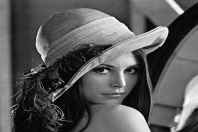

Resized with Linear Interpolation


In [ ]:
resized_linear = cv2.resize(image, None, fx=scale_percent / 100, fy=scale_percent / 100, interpolation=cv2.INTER_LINEAR)
cv2_imshow(cv2.cvtColor(resized_linear, cv2.COLOR_RGB2BGR))
print("Resized with Linear Interpolation")

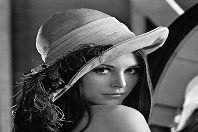

Resized with Nearest Neighbor Interpolation


In [ ]:
resized_nearest = cv2.resize(image, None, fx=scale_percent / 100, fy=scale_percent / 100, interpolation=cv2.INTER_NEAREST)
cv2_imshow(cv2.cvtColor(resized_nearest, cv2.COLOR_RGB2BGR))
print("Resized with Nearest Neighbor Interpolation")

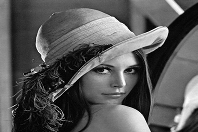

Resized with Polynomial Interpolation


In [ ]:
resized_cubic = cv2.resize(image, None, fx=scale_percent / 100, fy=scale_percent / 100, interpolation=cv2.INTER_CUBIC)
cv2_imshow(cv2.cvtColor(resized_cubic, cv2.COLOR_RGB2BGR))
print("Resized with Polynomial Interpolation")

In [ ]:
print("\n1.2 Image Blurring:")

# Set kernel size for blurring
kernel_size = 5



1.2 Image Blurring:


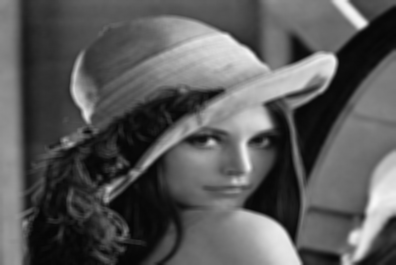

Box Blurring Applied


In [ ]:
blur_box = cv2.blur(image, (kernel_size, kernel_size))
cv2_imshow(cv2.cvtColor(blur_box, cv2.COLOR_RGB2BGR))
print("Box Blurring Applied")

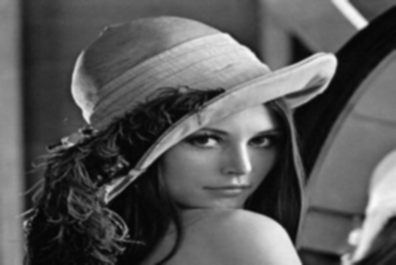

Gaussian Blurring Applied


In [ ]:
blur_gaussian = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
cv2_imshow(cv2.cvtColor(blur_gaussian, cv2.COLOR_RGB2BGR))
print("Gaussian Blurring Applied")

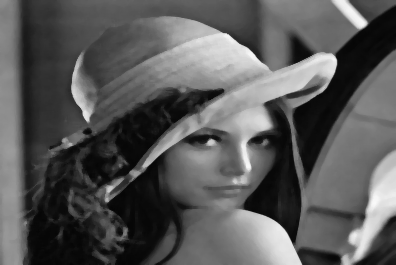

Adaptive Blurring (Median) Applied


In [ ]:
blur_median = cv2.medianBlur(image, kernel_size)
cv2_imshow(cv2.cvtColor(blur_median, cv2.COLOR_RGB2BGR))
print("Adaptive Blurring (Median) Applied")

# Task 2: Applying ML models to check accuracy


In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_curve,
    auc,
    RocCurveDisplay
)
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [2]:
# Load MNIST dataset using Keras
(X_train_full, y_train_full), (_, _) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
# Flatten images to 1D vectors and normalize pixel values
X = X_train_full.reshape(X_train_full.shape[0], -1) / 255.0
y = y_train_full

In [4]:
# Apply PCA to reduce dimensionality
print("Applying PCA for dimensionality reduction...")
pca = PCA(n_components=50)  # Reduce to 50 dimensions
X_pca = pca.fit_transform(X)

# Split into 80-20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

Applying PCA for dimensionality reduction...


In [5]:
print("\nTraining Naive Bayes model...")
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Cross-validation
nb_cv_scores = cross_val_score(nb_model, X_train, y_train, cv=kf, scoring='accuracy')
print(f"Naive Bayes Cross-Validation Accuracy: {nb_cv_scores.mean():.4f}")

# Predictions
y_pred_nb = nb_model.predict(X_test)


Training Naive Bayes model...
Naive Bayes Cross-Validation Accuracy: 0.8686


In [6]:
print("\nTraining Random Forest model...")
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Cross-validation for Random Forest
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring='accuracy')
print(f"Random Forest Cross-Validation Accuracy: {rf_cv_scores.mean():.4f}")

# Predictions with Random Forest
y_pred_rf = rf_model.predict(X_test)



Training Random Forest model...
Random Forest Cross-Validation Accuracy: 0.9489


In [8]:
from sklearn.preprocessing import label_binarize

# Binarize the labels for multi-class classification
y_test_bin = label_binarize(y_test, classes=np.arange(10))  # 10 classes for MNIST

# Get the predicted probabilities for each class
y_pred_prob = rf_model.predict_proba(X_test)

# Accuracy, Precision, Recall, F1-Score
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='weighted')
recall = recall_score(y_test, y_pred_rf, average='weighted')
f1 = f1_score(y_test, y_pred_rf, average='weighted')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# ROC and AUC
fpr, tpr, roc_auc = {}, {}, {}
for i in range(10):  # 10 classes for MNIST
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")

# Print AUC for each class
for i in range(10):
    print(f"Class {i} AUC: {roc_auc[i]:.4f}")


Accuracy: 0.9514
Precision: 0.9515
Recall: 0.9514
F1-Score: 0.9514
Confusion Matrix:
[[1168    0    0    3    1    0    5    1    6    1]
 [   0 1322   11    7    1    3    1    1    1    1]
 [   4    2 1133   14    6    1    3    7   19    3]
 [   2    0   22 1144    0   17    2    8   23    8]
 [   1    1    5    3 1118    0    5    3    2   30]
 [   6    1    1   23    6 1022    6    4    9    6]
 [   5    2    3    1    4   13 1152    0    4    0]
 [   0    7   19    4    9    2    0 1181    7   24]
 [   3   11    5   26    6   20    5    5 1078   11]
 [   2    2    5   24   23    6    0   21    8 1099]]
Class 0 AUC: 0.9997
Class 1 AUC: 0.9995
Class 2 AUC: 0.9981
Class 3 AUC: 0.9959
Class 4 AUC: 0.9982
Class 5 AUC: 0.9982
Class 6 AUC: 0.9990
Class 7 AUC: 0.9982
Class 8 AUC: 0.9947
Class 9 AUC: 0.9953
